In [196]:
from keras.models import Sequential
from keras.layers import Dense
import numpy as np
import matplotlib.pyplot as plt

from keras.layers import LSTM
from sklearn.model_selection import train_test_split

In [197]:
#data preparation

In [198]:
Data=[[[(i+j)*(i+j)*(i+j)/100000] for i in range(5)] for j in range(100)]
target=[(i+5)*(i+5)*(i+5)/100000 for i in range(100)]

In [199]:
Data



[[[0.0], [1e-05], [8e-05], [0.00027], [0.00064]],
 [[1e-05], [8e-05], [0.00027], [0.00064], [0.00125]],
 [[8e-05], [0.00027], [0.00064], [0.00125], [0.00216]],
 [[0.00027], [0.00064], [0.00125], [0.00216], [0.00343]],
 [[0.00064], [0.00125], [0.00216], [0.00343], [0.00512]],
 [[0.00125], [0.00216], [0.00343], [0.00512], [0.00729]],
 [[0.00216], [0.00343], [0.00512], [0.00729], [0.01]],
 [[0.00343], [0.00512], [0.00729], [0.01], [0.01331]],
 [[0.00512], [0.00729], [0.01], [0.01331], [0.01728]],
 [[0.00729], [0.01], [0.01331], [0.01728], [0.02197]],
 [[0.01], [0.01331], [0.01728], [0.02197], [0.02744]],
 [[0.01331], [0.01728], [0.02197], [0.02744], [0.03375]],
 [[0.01728], [0.02197], [0.02744], [0.03375], [0.04096]],
 [[0.02197], [0.02744], [0.03375], [0.04096], [0.04913]],
 [[0.02744], [0.03375], [0.04096], [0.04913], [0.05832]],
 [[0.03375], [0.04096], [0.04913], [0.05832], [0.06859]],
 [[0.04096], [0.04913], [0.05832], [0.06859], [0.08]],
 [[0.04913], [0.05832], [0.06859], [0.08], [0.

In [200]:
data=np.array(Data,dtype=float)
target=np.array(target,dtype=float)

In [201]:
data.shape
target.shape

(100,)

In [202]:
target

array([1.250000e-03, 2.160000e-03, 3.430000e-03, 5.120000e-03,
       7.290000e-03, 1.000000e-02, 1.331000e-02, 1.728000e-02,
       2.197000e-02, 2.744000e-02, 3.375000e-02, 4.096000e-02,
       4.913000e-02, 5.832000e-02, 6.859000e-02, 8.000000e-02,
       9.261000e-02, 1.064800e-01, 1.216700e-01, 1.382400e-01,
       1.562500e-01, 1.757600e-01, 1.968300e-01, 2.195200e-01,
       2.438900e-01, 2.700000e-01, 2.979100e-01, 3.276800e-01,
       3.593700e-01, 3.930400e-01, 4.287500e-01, 4.665600e-01,
       5.065300e-01, 5.487200e-01, 5.931900e-01, 6.400000e-01,
       6.892100e-01, 7.408800e-01, 7.950700e-01, 8.518400e-01,
       9.112500e-01, 9.733600e-01, 1.038230e+00, 1.105920e+00,
       1.176490e+00, 1.250000e+00, 1.326510e+00, 1.406080e+00,
       1.488770e+00, 1.574640e+00, 1.663750e+00, 1.756160e+00,
       1.851930e+00, 1.951120e+00, 2.053790e+00, 2.160000e+00,
       2.269810e+00, 2.383280e+00, 2.500470e+00, 2.621440e+00,
       2.746250e+00, 2.874960e+00, 3.007630e+00, 3.1443

In [203]:
x_train,x_test,y_train,y_test=train_test_split(data,target,test_size=0.2, random_state=4)

In [204]:
x_train[1]

array([[0.00064],
       [0.00125],
       [0.00216],
       [0.00343],
       [0.00512]])

In [205]:
#lstm implementation

In [206]:
model=Sequential()
model.add(LSTM((1),batch_input_shape=(None,5,1),return_sequences=True))
model.add(LSTM((1),return_sequences=False))

In [207]:

model.compile(loss='mean_absolute_error',optimizer='adam',metrics=['accuracy'])

In [208]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_22 (LSTM)               (None, 5, 1)              12        
_________________________________________________________________
lstm_23 (LSTM)               (None, 1)                 12        
Total params: 24
Trainable params: 24
Non-trainable params: 0
_________________________________________________________________


In [209]:
history=model.fit(x_train,y_train,epochs=500,validation_data=(x_test,y_test))

Train on 80 samples, validate on 20 samples
Epoch 1/500
80/80 [==============================] - 22s 279ms/step - loss: 3.4560 - acc: 0.0000e+00 - val_loss: 2.3604 - val_acc: 0.0000e+00
Epoch 2/500
80/80 [==============================] - 0s 1ms/step - loss: 3.4499 - acc: 0.0000e+00 - val_loss: 2.3556 - val_acc: 0.0000e+00
Epoch 3/500
80/80 [==============================] - 0s 1ms/step - loss: 3.4436 - acc: 0.0000e+00 - val_loss: 2.3510 - val_acc: 0.0000e+00
Epoch 4/500
80/80 [==============================] - 0s 1ms/step - loss: 3.4376 - acc: 0.0000e+00 - val_loss: 2.3465 - val_acc: 0.0000e+00
Epoch 5/500
80/80 [==============================] - 0s 1ms/step - loss: 3.4316 - acc: 0.0000e+00 - val_loss: 2.3421 - val_acc: 0.0000e+00
Epoch 6/500
80/80 [==============================] - 0s 1ms/step - loss: 3.4256 - acc: 0.0000e+00 - val_loss: 2.3377 - val_acc: 0.0000e+00
Epoch 7/500
80/80 [==============================] - 0s 1ms/step - loss: 3.4196 - acc: 0.0000e+00 - val_loss: 2.3334 - 

80/80 [==============================] - 0s 1ms/step - loss: 3.0645 - acc: 0.0000e+00 - val_loss: 2.1180 - val_acc: 0.0000e+00
Epoch 59/500
80/80 [==============================] - 0s 1ms/step - loss: 3.0622 - acc: 0.0000e+00 - val_loss: 2.1167 - val_acc: 0.0000e+00
Epoch 60/500
80/80 [==============================] - 0s 1ms/step - loss: 3.0600 - acc: 0.0000e+00 - val_loss: 2.1154 - val_acc: 0.0000e+00
Epoch 61/500
80/80 [==============================] - 0s 1ms/step - loss: 3.0581 - acc: 0.0000e+00 - val_loss: 2.1142 - val_acc: 0.0000e+00
Epoch 62/500
80/80 [==============================] - 0s 1ms/step - loss: 3.0563 - acc: 0.0000e+00 - val_loss: 2.1130 - val_acc: 0.0000e+00
Epoch 63/500
80/80 [==============================] - 0s 1ms/step - loss: 3.0546 - acc: 0.0000e+00 - val_loss: 2.1119 - val_acc: 0.0000e+00
Epoch 64/500
80/80 [==============================] - 0s 1ms/step - loss: 3.0529 - acc: 0.0000e+00 - val_loss: 2.1108 - val_acc: 0.0000e+00
Epoch 65/500
80/80 [=============

80/80 [==============================] - 0s 1ms/step - loss: 2.9859 - acc: 0.0000e+00 - val_loss: 2.0643 - val_acc: 0.0000e+00
Epoch 117/500
80/80 [==============================] - 0s 1ms/step - loss: 2.9845 - acc: 0.0000e+00 - val_loss: 2.0634 - val_acc: 0.0000e+00
Epoch 118/500
80/80 [==============================] - 0s 1ms/step - loss: 2.9832 - acc: 0.0000e+00 - val_loss: 2.0625 - val_acc: 0.0000e+00
Epoch 119/500
80/80 [==============================] - 0s 1ms/step - loss: 2.9819 - acc: 0.0000e+00 - val_loss: 2.0615 - val_acc: 0.0000e+00
Epoch 120/500
80/80 [==============================] - 0s 1ms/step - loss: 2.9807 - acc: 0.0000e+00 - val_loss: 2.0606 - val_acc: 0.0000e+00
Epoch 121/500
80/80 [==============================] - 0s 1ms/step - loss: 2.9792 - acc: 0.0000e+00 - val_loss: 2.0597 - val_acc: 0.0000e+00
Epoch 122/500
80/80 [==============================] - 0s 1ms/step - loss: 2.9779 - acc: 0.0000e+00 - val_loss: 2.0588 - val_acc: 0.0000e+00
Epoch 123/500
80/80 [======

80/80 [==============================] - 0s 1ms/step - loss: 2.9057 - acc: 0.0000e+00 - val_loss: 2.0131 - val_acc: 0.0000e+00
Epoch 174/500
80/80 [==============================] - 0s 1ms/step - loss: 2.9042 - acc: 0.0000e+00 - val_loss: 2.0124 - val_acc: 0.0000e+00
Epoch 175/500
80/80 [==============================] - 0s 2ms/step - loss: 2.9026 - acc: 0.0000e+00 - val_loss: 2.0117 - val_acc: 0.0000e+00
Epoch 176/500
80/80 [==============================] - 0s 1ms/step - loss: 2.9013 - acc: 0.0000e+00 - val_loss: 2.0110 - val_acc: 0.0000e+00
Epoch 177/500
80/80 [==============================] - 0s 1ms/step - loss: 2.8997 - acc: 0.0000e+00 - val_loss: 2.0102 - val_acc: 0.0000e+00
Epoch 178/500
80/80 [==============================] - 0s 1ms/step - loss: 2.8982 - acc: 0.0000e+00 - val_loss: 2.0095 - val_acc: 0.0000e+00
Epoch 179/500
80/80 [==============================] - 0s 1ms/step - loss: 2.8968 - acc: 0.0000e+00 - val_loss: 2.0088 - val_acc: 0.0000e+00
Epoch 180/500
80/80 [======

Epoch 231/500
80/80 [==============================] - 0s 1ms/step - loss: 2.8210 - acc: 0.0000e+00 - val_loss: 1.9691 - val_acc: 0.0000e+00
Epoch 232/500
80/80 [==============================] - 0s 1ms/step - loss: 2.8194 - acc: 0.0000e+00 - val_loss: 1.9683 - val_acc: 0.0000e+00
Epoch 233/500
80/80 [==============================] - 0s 1ms/step - loss: 2.8179 - acc: 0.0000e+00 - val_loss: 1.9676 - val_acc: 0.0000e+00
Epoch 234/500
80/80 [==============================] - 0s 1ms/step - loss: 2.8163 - acc: 0.0000e+00 - val_loss: 1.9668 - val_acc: 0.0000e+00
Epoch 235/500
80/80 [==============================] - 0s 1ms/step - loss: 2.8148 - acc: 0.0000e+00 - val_loss: 1.9660 - val_acc: 0.0000e+00
Epoch 236/500
80/80 [==============================] - 0s 1ms/step - loss: 2.8132 - acc: 0.0000e+00 - val_loss: 1.9652 - val_acc: 0.0000e+00
Epoch 237/500
80/80 [==============================] - 0s 1ms/step - loss: 2.8117 - acc: 0.0000e+00 - val_loss: 1.9644 - val_acc: 0.0000e+00
Epoch 238/500

80/80 [==============================] - 0s 1ms/step - loss: 2.7245 - acc: 0.0000e+00 - val_loss: 1.9051 - val_acc: 0.0000e+00
Epoch 290/500
80/80 [==============================] - 0s 1ms/step - loss: 2.7225 - acc: 0.0000e+00 - val_loss: 1.9035 - val_acc: 0.0000e+00
Epoch 291/500
80/80 [==============================] - 0s 1ms/step - loss: 2.7206 - acc: 0.0000e+00 - val_loss: 1.9019 - val_acc: 0.0000e+00
Epoch 292/500
80/80 [==============================] - 0s 1ms/step - loss: 2.7186 - acc: 0.0000e+00 - val_loss: 1.9004 - val_acc: 0.0000e+00
Epoch 293/500
80/80 [==============================] - 0s 1ms/step - loss: 2.7167 - acc: 0.0000e+00 - val_loss: 1.8989 - val_acc: 0.0000e+00
Epoch 294/500
80/80 [==============================] - 0s 1ms/step - loss: 2.7147 - acc: 0.0000e+00 - val_loss: 1.8973 - val_acc: 0.0000e+00
Epoch 295/500
80/80 [==============================] - 0s 1ms/step - loss: 2.7126 - acc: 0.0000e+00 - val_loss: 1.8957 - val_acc: 0.0000e+00
Epoch 296/500
80/80 [======

80/80 [==============================] - 0s 1ms/step - loss: 2.5906 - acc: 0.0000e+00 - val_loss: 1.7899 - val_acc: 0.0000e+00
Epoch 348/500
80/80 [==============================] - 0s 1ms/step - loss: 2.5878 - acc: 0.0000e+00 - val_loss: 1.7875 - val_acc: 0.0000e+00
Epoch 349/500
80/80 [==============================] - 0s 1ms/step - loss: 2.5850 - acc: 0.0000e+00 - val_loss: 1.7850 - val_acc: 0.0000e+00
Epoch 350/500
80/80 [==============================] - 0s 1ms/step - loss: 2.5823 - acc: 0.0000e+00 - val_loss: 1.7825 - val_acc: 0.0000e+00
Epoch 351/500
80/80 [==============================] - 0s 1ms/step - loss: 2.5795 - acc: 0.0000e+00 - val_loss: 1.7799 - val_acc: 0.0000e+00
Epoch 352/500
80/80 [==============================] - 0s 1ms/step - loss: 2.5766 - acc: 0.0000e+00 - val_loss: 1.7772 - val_acc: 0.0000e+00
Epoch 353/500
80/80 [==============================] - 0s 1ms/step - loss: 2.5738 - acc: 0.0000e+00 - val_loss: 1.7746 - val_acc: 0.0000e+00
Epoch 354/500
80/80 [======

80/80 [==============================] - 0s 1ms/step - loss: 2.4744 - acc: 0.0000e+00 - val_loss: 1.6653 - val_acc: 0.0000e+00
Epoch 406/500
80/80 [==============================] - 0s 1ms/step - loss: 2.4734 - acc: 0.0000e+00 - val_loss: 1.6639 - val_acc: 0.0000e+00
Epoch 407/500
80/80 [==============================] - 0s 1ms/step - loss: 2.4725 - acc: 0.0000e+00 - val_loss: 1.6625 - val_acc: 0.0000e+00
Epoch 408/500
80/80 [==============================] - 0s 1ms/step - loss: 2.4716 - acc: 0.0000e+00 - val_loss: 1.6611 - val_acc: 0.0000e+00
Epoch 409/500
80/80 [==============================] - 0s 1ms/step - loss: 2.4706 - acc: 0.0000e+00 - val_loss: 1.6597 - val_acc: 0.0000e+00
Epoch 410/500
80/80 [==============================] - 0s 1ms/step - loss: 2.4697 - acc: 0.0000e+00 - val_loss: 1.6583 - val_acc: 0.0000e+00
Epoch 411/500
80/80 [==============================] - 0s 1ms/step - loss: 2.4688 - acc: 0.0000e+00 - val_loss: 1.6568 - val_acc: 0.0000e+00
Epoch 412/500
80/80 [======

80/80 [==============================] - 0s 1ms/step - loss: 2.4595 - acc: 0.0000e+00 - val_loss: 1.6488 - val_acc: 0.0000e+00
Epoch 463/500
80/80 [==============================] - 0s 1ms/step - loss: 2.4595 - acc: 0.0000e+00 - val_loss: 1.6490 - val_acc: 0.0000e+00
Epoch 464/500
80/80 [==============================] - 0s 1ms/step - loss: 2.4594 - acc: 0.0000e+00 - val_loss: 1.6486 - val_acc: 0.0000e+00
Epoch 465/500
80/80 [==============================] - 0s 1ms/step - loss: 2.4595 - acc: 0.0000e+00 - val_loss: 1.6479 - val_acc: 0.0000e+00
Epoch 466/500
80/80 [==============================] - 0s 1ms/step - loss: 2.4594 - acc: 0.0000e+00 - val_loss: 1.6474 - val_acc: 0.0000e+00
Epoch 467/500
80/80 [==============================] - 0s 1ms/step - loss: 2.4594 - acc: 0.0000e+00 - val_loss: 1.6478 - val_acc: 0.0000e+00
Epoch 468/500
80/80 [==============================] - 0s 1ms/step - loss: 2.4593 - acc: 0.0000e+00 - val_loss: 1.6480 - val_acc: 0.0000e+00
Epoch 469/500
80/80 [======

In [210]:
results=model.predict(x_test)

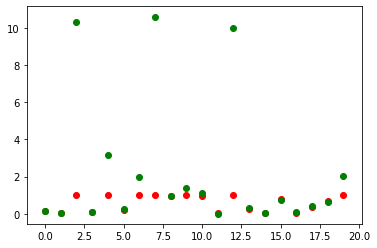

In [211]:
plt.scatter(range(20),results,c='r')
plt.scatter(range(20),y_test,c='g')
plt.show()

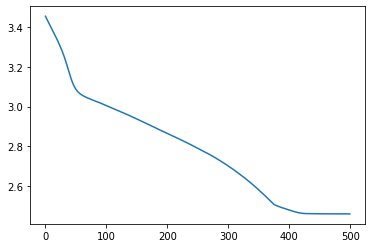

In [212]:
plt.plot(history.history['loss'])
plt.show()
